In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("./Kedarnath/Kedarnath_combine.csv", index_col=0)
df1 = df1.set_index('Album')
df1 = df1.reset_index()
df1

,Album,Lyrics
0,Kedarnath,\n\r\nNa maaregi deewangi meri\nNa maaregi awa...


In [3]:
import re
import string

def round1(text):
    #lower the Text
    text = text.lower()
    # Remove Numbers 
    text = re.sub(r"\d+", "", text)
    # Remove Symbols and special characters
    # Below return true if not alphanumereic 
    text = re.sub(r'[^\w]', ' ', text)
    # Remove more than a single whitespace 
    text = ' '.join(text.split())
    # Remove Leading and Trailing Whitespaces
    text = text.strip()
    return text
rnd1 = lambda x: round1(x)

In [4]:
df2 = df1.copy()
df2['Lyrics'] = df2['Lyrics'].apply(rnd1)
df2

,Album,Lyrics
0,Kedarnath,na maaregi deewangi meri na maaregi awaargi me...


In [5]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = nltk.corpus.stopwords.words('english')
t =['re','ve', 'em', 'll', 't', 's', 'don', 'ain', 'didn' ,'m' , 'wan', 'na' , 'la', 'gon', 'wan']

stopwords.extend(t)
stop = stopwords + list(string.punctuation)

def cleaning(text):
    clean_doc=[]
    for x in text:
        clean_sent=[]
        for i in word_tokenize(x):
        #for i in x.lower(): 
            if i not in stop:
                clean_sent.append(i) 
        clean_doc.append(clean_sent)
    return clean_doc 

In [6]:
df3 = df2.copy()
df3['Lyrics'] = cleaning(df3['Lyrics'])
df3

,Album,Lyrics
0,Kedarnath,"[maaregi, deewangi, meri, maaregi, awaargi, me..."


In [7]:
s = ' '
for i in range(len(df3)):
    df3['Lyrics'].loc[i] = s.join(df3['Lyrics'].loc[i])
df3

,Album,Lyrics
0,Kedarnath,maaregi deewangi meri maaregi awaargi meri ki ...


In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def Lemmatizing(text):
    pre_doc= []
    for word in text:
        pre_doc.append(wordnet.lemmatize(word))
    return pre_doc

In [9]:
df4 = df3.copy()
df4['Lyrics'] = Lemmatizing(df4['Lyrics'])
df4

,Album,Lyrics
0,Kedarnath,maaregi deewangi meri maaregi awaargi meri ki ...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
df5 = cv.fit_transform(df4['Lyrics'])
df6 = pd.DataFrame(df5.toarray(), columns = cv.get_feature_names())
df6.index = df4['Album']
df6

,aa,aadi,aah,aane,aankh,aastha,aayi,acha,afreen,aise,...,yaar,yaara,yaari,ye,yeh,yun,zamaane,zayka,zidd,zyada
Album,,,,,,,,,,,,,,,,,,,,,
Kedarnath,2,1,2,1,1,1,7,2,2,8,...,3,1,1,2,1,2,1,1,2,4


In [11]:
df7= df6.transpose()
df7

Album,Kedarnath
aa,2
aadi,1
aah,2
aane,1
aankh,1
...,...
yun,2
zamaane,1
zayka,1
zidd,2


In [12]:
top_dict= {}
for c in df7.columns:
    top = df7[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [13]:
for album, top_words in top_dict.items ():
    print(album)
    print(', '.join([word for word, count in top_words]))
    print('------------')

Kedarnath
hai, shankara, mein, ke, ho, hey, kya, ki, se, jo, bholenath, meri, toh, namo, teri, jaan, pe, shivay, wahi, ji, aise, mile, nisaar, sweetheart, tere, wah, tum, aayi, jaise, ya
------------


In [43]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


def wordcloud_gen(text,i):
    msk = np.array(Image.open("maskman.png"))
    # Create the wordcloud object
    wordcloud = WordCloud(#stopwords = add_stop_words,
                          font_path='Ananda Namaste Regular.ttf',
                          mask = msk,
                          width=480, height=480,
                          #width=980, height=980,
                          #max_words=150, 
                          background_color="teal", 
                          #white, grey, pink, skyblue
                          colormap="YlOrRd", 
                          #Dark2, ocean, Accent, BuPu, PuBuGn, summer, Spectral,seismic
                          min_font_size = 28,
                          #max_font_size=150, 
                          #collocations=False,
                          random_state=42).generate(text)
    
    #wordcloud.to_file(i +".png")
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

Kedarnath


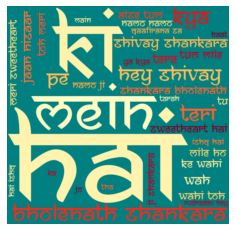

In [44]:
for i in range (len(df4)):
    print(df4["Album"].loc[i])
    wordcloud_gen(df4['Lyrics'].loc[i],df4["Album"].loc[i])